Number of Frame:  [ 1  2  3  4  5  6  7  8  9 10] 

Page fault for each algorithn

FIFO : [12 10  9  9  6  6  6  6  6  6]
OPR : [12  8  7  6  6  6  6  6  6  6]
LRU : [12 10  9  8  7  8  9  9  9 10]


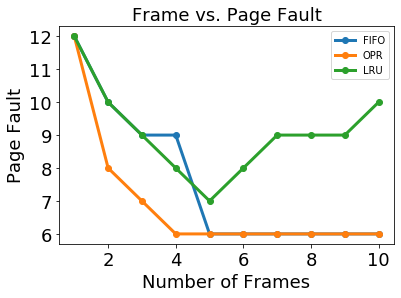

<Figure size 432x288 with 0 Axes>

In [19]:
## Implementation of page replacement algorithms using FIFO, OPR, and LRU

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------------------------------
# User defined function for FIFO -----------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------
def FIFO(PageReference, NumberOfFrame):
    Frame = [np.inf for i in range(NumberOfFrame)]
    j = 0
    PageFault = 0
    for i in range(len(PageReference)):
        PreIndex = j
        if PageReference[i] not in Frame:
            PageFault += 1
            Frame[j] = PageReference[i]
            j = (j + 1) % NumberOfFrame
    return PageFault
    

#-------------------------------------------------------------------------------------------------------
# User defined function for OPR -----------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------
def OPR(PageReference, NumberOfFrame):
    Frame = [np.inf for i in range(NumberOfFrame)]
    j = 0
    PageFault = 0
    for i in range(len(PageReference)):
        if PageReference[i] not in Frame:
            RestList = PageReference[i+1:len(PageReference)]
            Position = -1
            index = -1            
            if np.inf in Frame:
                index = Frame.index(np.inf)
            else:
                for k in range(NumberOfFrame): 
                    if Frame[k] in RestList:
                        P = RestList.index(Frame[k])
                        if P>Position:
                            Position = P
                            index = k
                    else:
                        index = k
                        break;
            if index != -1:
                Frame[index] = PageReference[i]
            else:
                Frame[j] = PageReference[i]
                j = (j + 1) % NumberOfFrame            
            PageFault += 1
    return PageFault



#-------------------------------------------------------------------------------------------------------
# User defined function for Least Recently Used --------------------------------------------------------
#-------------------------------------------------------------------------------------------------------
def LRU(PageReference, NumberOfFrame):
    Frame = [np.inf for i in range(NumberOfFrame)]
    IndexList = [i for i in range(NumberOfFrame)]
    j = 0
    PageFault = 0
    for i in range(len(PageReference)):
        if np.inf in Frame:
            index = Frame.index(np.inf)
            Frame[index] = PageReference[i]
            IndexList.pop(0)
            IndexList.append(index)
            PageFault += 1
        elif PageReference[i] not in Frame:
            Pos = IndexList[0];
            Frame[Pos] = PageReference[i]
            IndexList.pop(0)
            IndexList.append(Pos)
            PageFault += 1
        else:
            index = Frame.index(PageReference[i])
            index_p = IndexList.index(index)
            IndexList.pop(index_p)
            IndexList.append(index)
    return PageFault

#-------------------------------------------------------------------------------------------------------
# User defined function for check the dynamic frame effect  --------------------------------------------------------
#-------------------------------------------------------------------------------------------------------
def DynamicFrame_effect(PageReference, Minimum_Frame, Maximum_Frame):
    PageFault_Array = np.zeros([3, (Maximum_Frame - Minimum_Frame + 1)], dtype = int)
    Frame_Array = np.zeros([(Maximum_Frame - Minimum_Frame + 1)], dtype = int)
    label_array = ['FIFO', 'OPR', 'LRU']
    for NumberOfFrame in (range(Minimum_Frame, (Maximum_Frame + 1))):
        Frame_Array[NumberOfFrame - Minimum_Frame] = NumberOfFrame
        PageFault_Array[0,NumberOfFrame - Minimum_Frame] = FIFO(PageReference, NumberOfFrame)
        PageFault_Array[1,NumberOfFrame - Minimum_Frame] = OPR(PageReference, NumberOfFrame)
        PageFault_Array[2,NumberOfFrame - Minimum_Frame] = LRU(PageReference, NumberOfFrame)
    print('Number of Frame: ',Frame_Array,'\n\nPage fault for each algorithn\n')
    for i in range(len(label_array)):
        print(label_array[i], ':', PageFault_Array[i,:])
    for i in range(len(label_array)):
        plt.plot(Frame_Array,PageFault_Array[i,:], marker='o', linewidth=3, label=label_array[i])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title('Frame vs. Page Fault',fontsize=18)
    plt.xlabel('Number of Frames',fontsize=18)
    plt.ylabel('Page Fault',fontsize=18)
    plt.legend()
    plt.show()
    plt.savefig('PageReplacement_dynamicFrame.png')
    
#-------------------------------------------------------------------------------------------------------
# Input parapeters -------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------

# Pre-defined
Minimum_Frame = 1;
Maximum_Frame = 10;
#PageReference = [7, 0, 1, 2, 0, 3, 0, 4, 2, 3, 0, 3, 2, 3]
#PageReference = [5, 7, 6, 0, 7, 1, 7, 2, 0, 1, 7, 1, 0]
PageReference = [0, 2, 1, 6, 4, 0, 1, 0, 3, 1, 2, 1]

# Run Time Input
#Minimum_Frame = int(input('Enter the Minimum_Frame Size: '))
#Maximum_Frame = int(input('Enter the Maximum_Frame Size: '))
#PageReference = list(map(int, input('Enter page referances [separated by space]: ').split(' ')))

#-------------------------------------------------------------------------------------------------------
# Function calling -------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------

DynamicFrame_effect(PageReference, Minimum_Frame, Maximum_Frame)